In [1]:
import cv2

In [2]:
import numpy as np

In [10]:
import cv2

input = cv2.imread('./input.jpg')

cv2.imshow('Hello World', input)

cv2.waitKey()

cv2.destroyAllWindows()

In [11]:
import numpy as np

In [14]:
print(input.shape)

(225L, 225L, 3L)


In [18]:
print('Height of Image:', int(input.shape[0]), 'pixels')
print('Width of Image:', int(input.shape[1]), 'pixels')

('Height of Image:', 225, 'pixels')
('Width of Image:', 225, 'pixels')


In [19]:
cv2.imwrite('output.jpg', input)

True

In [30]:
out = cv2.imread('./output.jpg')
cv2.imshow(' ',out)
cv2.waitKey()
cv2.destroyAllWindows()


## Lets convert our color image into greyscale

In [2]:
import cv2

# Load out image
image = cv2.imread('./input.jpg')
cv2.imshow('Original Image', image)
cv2.waitKey()

# we use cvtColor to convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('GrayScaled Image', gray_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
# Another Faster method
img = cv2.imread('./input.jpg',0)
cv2.imshow('gray_scaled image', img)
cv2.waitKey()
cv2.destroyAllWindows()


## Color Spaces

In [1]:
import cv2
import numpy as np

image = cv2.imread('./input.jpg')

## Let's look at the individual color levels for the first pixel(0,0)

In [12]:
# B,G,R values for the first pixel 0,0
B, G, R = image[10,70]
print B,G,R

42 49 58


In [7]:
# Let's see what happens when we convert it into grayscale
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print gray_img.shape

(225L, 225L)


In [15]:
gray_img[10,18]

31

## Another usefull color space is HSV
Infact HSV is very useful in color filtering.

In [17]:
# H: 0 - 150, S: 0-255, V: 0 - 255

image = cv2.imread('./input.jpg')
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

cv2.imshow('HSV image', hsv_image)
cv2.imshow('Hue channel', hsv_image[:,:,0])
cv2.imshow('Saturation channel', hsv_image[:,:,1])
cv2.imshow('Value channel', hsv_image[:,:,2])

cv2.waitKey()
cv2.destroyAllWindows()

## Let's explore looking at individual channels in an RGB image

In [15]:
image = cv2.imread('./input.jpg')

# OpenCV's 'split' function splites the image into each color index
B, G, R = cv2.split(image)


print B.shape
cv2.imshow('Red',R)
cv2.imshow('Green',G)
cv2.imshow('Blue',B)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Let's re-make the image
merged  = cv2.merge([B,G,R])
cv2.imshow('Merged',merged)

# Let's amplify the red color
merged = cv2.merge([B, G, R+20])
cv2.imshow('Merged with red amplified',merged)

cv2.waitKey(0)
cv2.destroyAllWindows()

(225L, 225L)


In [16]:
# if you want to see B, G and R Images seperately

In [36]:
import cv2
import numpy as np

B,G,R = cv2.split(image)

# Let's create a matrix of zeros
# with dimensions of the image h x w
zeros = np.zeros(image.shape[:2],dtype = "uint8")

cv2.imshow('Red', cv2.merge([zeros, zeros, R]))
cv2.imshow('Green', cv2.merge([zeros, G, zeros]))
cv2.imshow('Blue', cv2.merge([B, zeros, zeros]))

cv2.waitKey(0)
cv2.destroyAllWindows()


In [20]:
print image.shape[:2]

(225L, 225L)


## Histograms

### Histograms are great way to visualize the individual color components

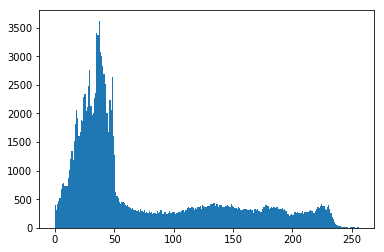

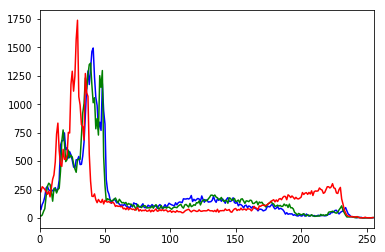

In [55]:
import cv2
import numpy as np

# We needd to import matplotlib to create our histogram plots
from matplotlib import pyplot as plt

image = cv2.imread('./input.jpg')
histogram  = cv2.calcHist([image], [2], None,[256],[0, 256])

# We plot a histogram, ravel() flatens our image array
plt.hist(image.ravel(),256,[0,256])
plt.show()

# Viewing Seperate Color Channels
color = ('b','g','r')

# We now sperate the colors and plot each in the histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None,[256],[0,256])
    plt.plot(histogram2,color = col)
    plt.xlim([0,256])
    
plt.show()


#### cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) → hist

## Drawing images and shapes using openCV
Let's start off by making a black square

In [57]:
import cv2
import numpy as np

# Create a black image
image = np.zeros((512,512,3), np.uint8)

# Can we make this in black and white ?
image_bw = np.zeros((512,512), np.uint8)

cv2.imshow('Black Rectangel (Color)', image)
cv2.imshow('Black Rectangel (B&W)', image_bw)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Let's Draw Line over our black square
cv2.line(image, starting coordinates, ending coordinates, color, thickness)

In [64]:
# Draw a diagonal blue line of thickness of 5 pixels
image = np.zeros((512,512,3),np.uint8)
cv2.line(image, (0,0),(511,511),(245,60,50),3)
cv2.imshow('Blue Line', image)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Let's now Draw Rectangle
cv2.rectangle(image, starting vertex, opposite vertex, color, thickness)

In [65]:
# Draw a Rectangle in 
image = np.zeros((512,512,3), np.uint8)

cv2.rectangle(image, (100,100),(350,300),(89,255,67),3)
cv2.imshow('Rectangle',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## How about circles ?
cv2.circle(image, centre, radius, color, fill)

In [74]:
image = np.zeros((512,512,3), np.uint8)

cv2.circle(image,(256,256),80,(23,255,67),-1)
cv2.imshow('Circle',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## And polygons ?

In [82]:
image = np.zeros((512,512,3), np.uint8)

# let's define four points
pts = np.array([[10,50], [400,50],[90,200],[50,500]], np.int32)

# Let's now reshape our points required by polylines
pts = pts.reshape((-1,1,2))

cv2.polylines(image, [pts],True, (0,0,255),3)
cv2.imshow('Polygon', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Let's even add text with cv2.putText
cv2.putText(image, 'Text to display', bottom left starting point, Font, Font Size, Color, Thickness)

* FONT_HERSHLEY_SIMPLEX, FONT_HERSHLEY_PLAIN


In [87]:
image = np.zeros((512,512,3), np.uint8)

cv2.putText(image, 'Hello Gandhapu Kalyan!',(75,290),cv2.FONT_HERSHEY_COMPLEX,1,(100,170,0),1)
cv2.imshow('Hello world!', image)
cv2.waitKey(0)
cv2.destroyAllWindows()